# Stochatic intergral of fuctions w.r.t random variable

## Problem description


We now consider the following problems, what is the result of the following integral
$$\int_0^t f\left(\mathbf{\mathit{X_s}}, s\right) d \mathbf{\mathit{B_s}}$$
This can be also defined as the following format:
$$\lim_{\Delta t\rightarrow 0}\sum_{i=1}^{\infty} f\left(\mathbf{\mathit{X_{s_{i-1}}}}, s_{i-1}\right) \left(\mathbf{\mathit{B_{s_{i}}}}-\mathbf{\mathit{B_{s_{i-1}}}}\right)$$
Of course, this function now becomes to random variable. We can simulate some simple results as follows.

The simplest one shall be the integral $\int_0^t \mathbf{\mathit{B_s}} d \mathbf{\mathit{B_s}}$. Following is the simulation code.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def simulate_integral(func, tmin, tmax, ndiv = 1000):
    dt = (tmax - tmin)/ndiv
    sigma = np.sqrt(dt)
    inc = np.random.randn(ndiv)*sigma
    xval = np.roll(np.add.accumulate(inc), 1)
    return sum(func(xval) * inc)

print(simulate_integral(lambda x: x, 0, 1))

0.7045058699427437


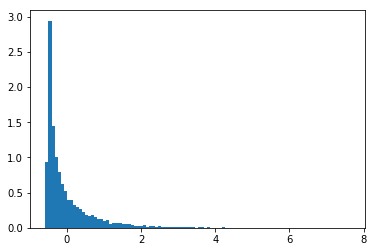

In [6]:
N = 10000

results = []
for _ in range(N):
    results.append(simulate_integral(lambda x: x, 0, 1, 1000))

plt.hist(results, bins=100, density=True)
plt.show()

This is obviously not a normal distribution, huh? In fact, the result is something like a ***chi-squared distribution***,  which can be proved as follows.
According to Itô's formula, if X is a Itô process, i.e.
$$d\mathbf{\mathit{X_t}}=\mu\left(\mathbf{\mathit{X_t}},t\right) dt + \sigma\left(\mathbf{\mathit{X_t}},t\right)d \mathbf{\mathit{B_t}}  $$
And $f\left(x, t\right)$ is a second-order differentiable function, then the following equality holds,
$$ df\left(\mathit{X_t}, t\right) = \frac{\partial{f}}{\partial{t}} dt + \mu\frac{\partial{f}}{\partial{\mathbf{\mathit{X_t}}}} d\mathbf{\mathit{X_t}} + \frac{\sigma^2}{2}\frac{\partial^2{f}}{\partial{\mathbf{\mathit{X_t}}}^2} dt $$
Here we simply set  $f\left(x, t\right) = x^2$, and $d\mathbf{\mathit{X_t}}=d\mathbf{\mathit{B_t}}$  then following equality holds,
$$d(\mathbf{\mathit{B_t}}^2) = 2\mathbf{\mathit{B_t}}d\mathbf{\mathit{B_t}} + dt$$
move dt from right to left, and integrate from both tow sides, divide both sides by two, we have (since $\mathbf{\mathit{B_0}}=0$)
$$\int_0^t\mathbf{\mathit{B_s}}d\mathbf{\mathit{B_s}} = \frac{1}{2} \mathbf{\mathit{B_t}}^2 - \frac{t}{2}$$

Higher order moments of Gaussian can be calculated by $\sigma^n(n-1)!!$, so the expectation of integral is $0$, and variance is $\frac{1}{2}t^2$

We know from [*chi-squared distribution*](https://en.wikipedia.org/wiki/Chi-squared_distribution) that the mean of this distribution is $k$, while the variance is $2k^2$ (here we have consider variance of normal distribution $\sigma^2$), here we can see the variance is $t^2$, so the mean shall be $t/2$, which is then cancelled out to be mean $0$.

Then let us check if this relation ship holds (using biased estimation).

In [7]:
#
results = np.array(results)
mu = np.average(results)
sigma_sq = np.average(results**2) - mu**2
print(mu, sigma_sq)

0.006230470515653758 0.5160422656855123


We can see $\mu$ and $\sigma^2$ are as we expected. So this experiment seems to suggest a correct result. Cheers!